In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
data=pd.read_csv(r"C:\Users\Shivam\Desktop\datasets\updated_pollution_dataset.csv")
data['Air Quality'].unique()

array(['Moderate', 'Good', 'Hazardous', 'Poor'], dtype=object)

In [6]:
encode=LabelEncoder()
data['Air Quality']=encode.fit_transform(data['Air Quality'])
print(encode.classes_)

['Good' 'Hazardous' 'Moderate' 'Poor']


In [7]:
x=data.iloc[:,0:9]
y=data.iloc[:,-1]

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1000)

In [9]:
model1=AdaBoostClassifier(algorithm='SAMME')
model1.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME')

In [10]:
score1= accuracy_score(y_test,model1.predict(x_test))
score1

0.6568

In [11]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
score2=accuracy_score(y_test,model2.predict(x_test))
score2

0.96

In [13]:
print(model2.feature_importances_)

[0.07012805 0.03301582 0.01367667 0.01923976 0.09378343 0.10385324
 0.35716076 0.27515396 0.03398833]


In [14]:
print(model1.feature_importances_)

[0.07254512 0.01999958 0.         0.02097209 0.10873935 0.09511758
 0.39158817 0.23507319 0.05596491]


In [15]:
newx=data.iloc[:,[7,6]]
newx.head()

,Proximity_to_Industrial_Areas,CO
0,6.3,1.72
1,6.0,1.64
2,5.2,1.63
3,11.1,1.15
4,12.7,1.01


In [16]:
newx_train,newx_test,y1_train,y1_test=train_test_split(newx,y,test_size=0.25,random_state=1000)

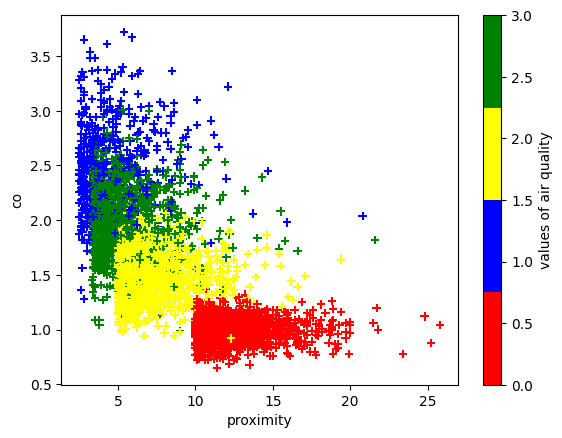

In [17]:
colorsceme=ListedColormap(('red','blue','yellow','green'))
scatter=plt.scatter(newx.iloc[:,0],newx.iloc[:,1],c=y,cmap=colorsceme,marker='+')
plt.colorbar(scatter,label='values of air quality')
plt.xlabel('proximity')
plt.ylabel('co')
plt.show()

In [18]:
model3=RandomForestClassifier(n_estimators=200)
model3.fit(newx_train,y1_train)

RandomForestClassifier(n_estimators=200)

In [19]:
score3=accuracy_score(y1_test,model3.predict(newx_test))
score3

0.8976

In [20]:
def decisionboundaryplot(x,y,clf):
    x1,x2=np.meshgrid(
    np.arange(start=x.iloc[:,0].min()-1,stop=x.iloc[:,0].max()+1,step=0.01),
    np.arange(start=x.iloc[:,1].min()-1,stop=x.iloc[:,1].max()+1,step=0.01)
    )
    z=clf.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape)
    plt.contourf(x1,x2,z,alpha=0.7,cmap=colorsceme)
    plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y,cmap=colorsceme,marker='+')
    plt.xlabel('1st column')
    plt.ylabel('2nd column')
    return plt.show()

c:\Users\Shivam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


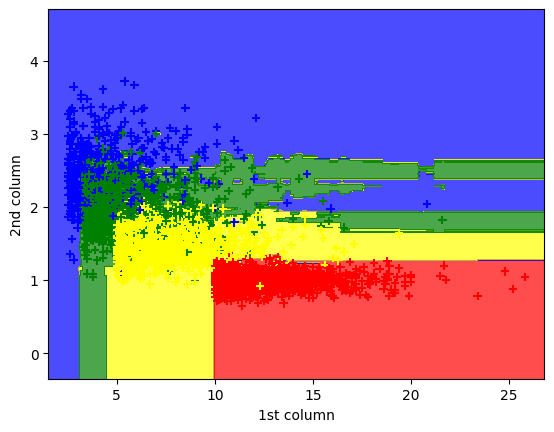

In [21]:
decisionboundaryplot(newx,y,model3)

In [22]:
model4=AdaBoostClassifier(algorithm='SAMME',learning_rate=0.5)
model4.fit(newx_train,y1_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5)

In [23]:
score4=accuracy_score(y1_test,model4.predict(newx_test))
score4

0.8808

c:\Users\Shivam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


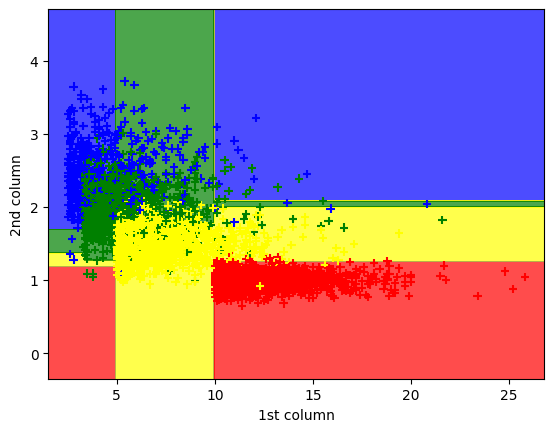

In [24]:
decisionboundaryplot(newx,y,model4)